## Pruning

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

### Model without pruning

In [34]:
X,y=load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
clf=DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)
y_train_predicted=clf.predict(X_train)
y_test_predicted=clf.predict(X_test)
print('Accuracy Score of training data :',accuracy_score(y_train,y_train_predicted))
print('Accuracy Score of test data :',accuracy_score(y_test,y_test_predicted))

Accuracy Score of training data : 1.0
Accuracy Score of test data : 0.8811188811188811


### Visualize Decision Tree

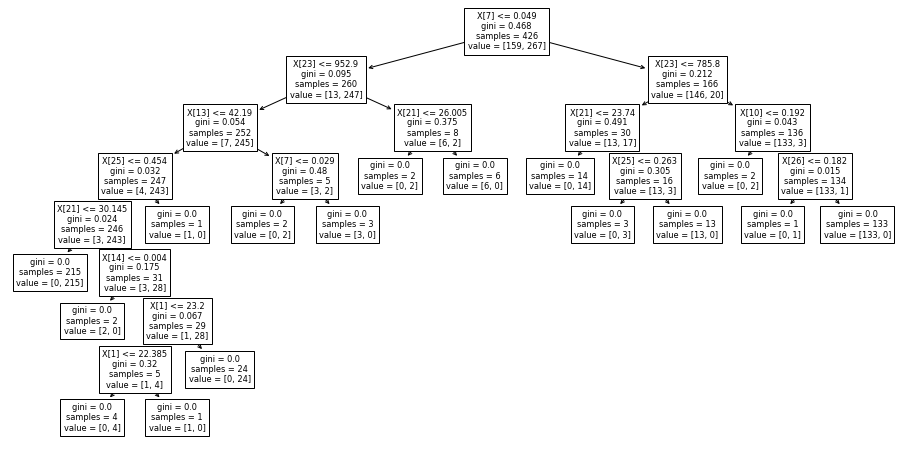

In [35]:
plt.figure(figsize=(16,8))
tree.plot_tree(clf)
plt.show()

### Post Prunning Operations

In [36]:
path=clf.cost_complexity_pruning_path(X_train,y_train)
#path variable gives two things ccp_alphas and impurities
ccp_alphas,impurities = path.ccp_alphas,path.impurities
print("------------------------------------------------------------------")
print("ccp alpha wil give list of values :\n",ccp_alphas)
print("------------------------------------------------------------------")
print("Impurities in Decision Tree :\n",impurities)
print("------------------------------------------------------------------")

------------------------------------------------------------------
ccp alpha wil give list of values :
 [0.         0.00226647 0.00464743 0.0046598  0.0056338  0.00704225
 0.00784194 0.00911402 0.01144366 0.018988   0.02314163 0.03422475
 0.32729844]
------------------------------------------------------------------
Impurities in Decision Tree :
 [0.         0.00453294 0.01847522 0.02313502 0.02876883 0.03581108
 0.04365302 0.05276704 0.0642107  0.0831987  0.10634033 0.14056508
 0.46786352]
------------------------------------------------------------------


#### 
ccp_alphas gives minimum leaf value of decision tree and each ccp_alphas will create different - different classifier and choose best out of it.ccp_alphas will be added as a parameter in DecisionTreeClassifier() .

In [37]:
clfs=[]   #will store all the models here
for ccp_alpha in ccp_alphas:
    clf=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf.fit(X_train,y_train)
    clfs.append(clf)
print("Last node in Decision tree is {} and ccp_alpha for last node is {}".format(clfs[-1].tree_.node_count,ccp_alphas[-1]))

Last node in Decision tree is 1 and ccp_alpha for last node is 0.3272984419327777


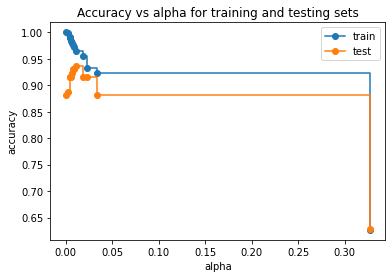

In [38]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",drawstyle="steps-post")
ax.legend()
plt.show()

#### If we folow bias and variance tradeoff we will choose that point which will have low bias(low training error) and low variance(low test error).Here we get that point at a value of alpha=0.02.

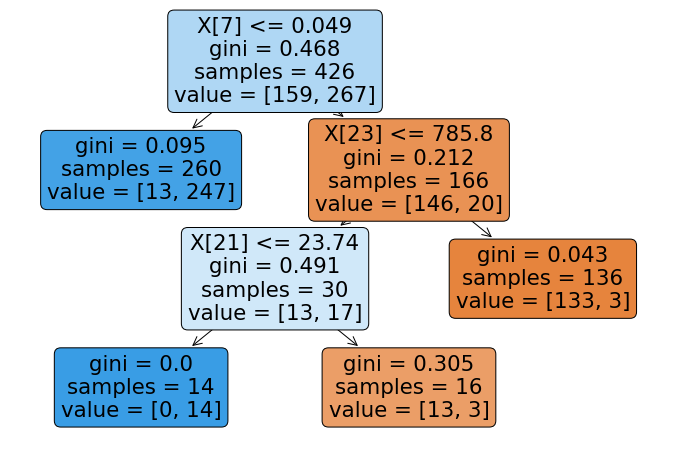

In [39]:
clf=DecisionTreeClassifier(random_state=0,ccp_alpha=0.02)
clf.fit(X_train,y_train)
plt.figure(figsize=(12,8))
tree.plot_tree(clf,rounded=True,filled=True)
plt.show()

In [40]:
accuracy_score(y_test,clf.predict(X_test))

0.916083916083916

In [44]:
print('The accuracy score is :',round(accuracy_score(y_test,clf.predict(X_test)),2)*100)

The accuracy score is : 92.0


### Pre Pruning 

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
grid_param={"criterion":["gini","entropy"],
             "splitter":["best","random"],
             "max_depth":range(2,50,1),
             "min_samples_leaf":range(1,15,1),
             "min_samples_split":range(2,20,1) 
            }
grid_search=GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs=-1)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(ccp_alpha=0.02, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 50),
                         'min_samples_leaf': range(1, 15),
                         'min_samples_split': range(2, 20),
                         'splitter': ['best', 'random']})

In [11]:
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'random'}


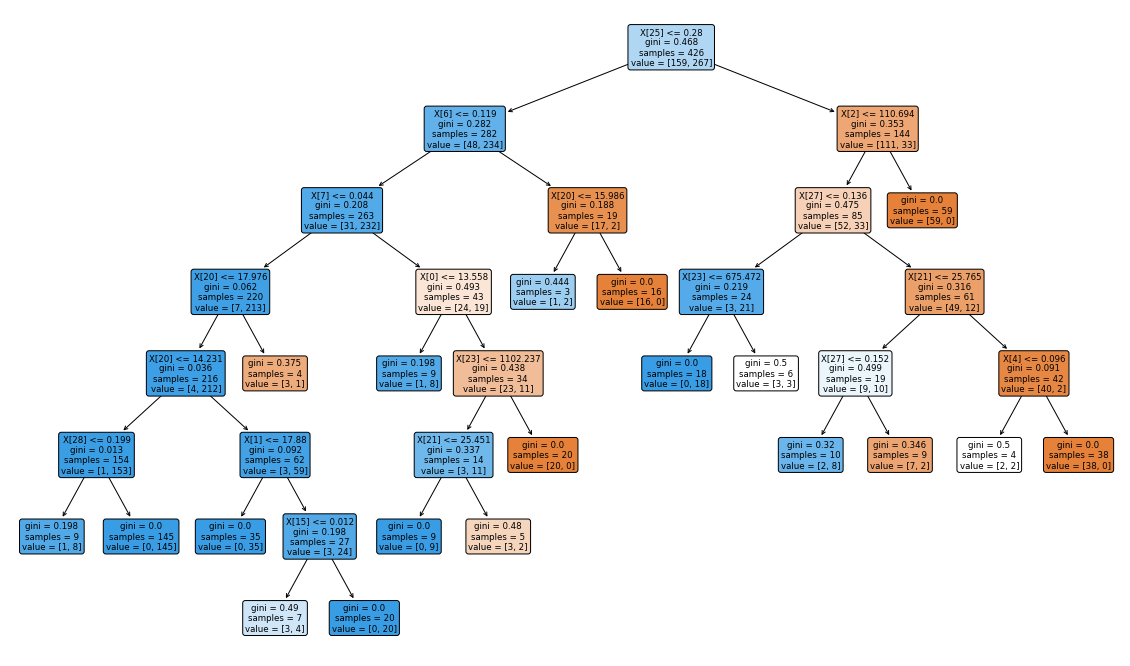

In [12]:
clf=DecisionTreeClassifier(criterion= 'gini',max_depth= 17,min_samples_leaf= 3,min_samples_split= 12,splitter= 'random')
clf.fit(X_train,y_train)
plt.figure(figsize=(20,12))
tree.plot_tree(clf,rounded=True,filled=True)
plt.show()

In [13]:
y_predicted=clf.predict(X_test)

0.9370629370629371

In [31]:
print('The accuracy score is :',round(accuracy_score(y_test,y_predicted),3)*100)

The accuracy score is : 93.7
